In [1]:
!pip install kaggle

In [2]:
import os
import shutil

# Path to your downloaded kaggle.json (update this path if needed)
source = "kaggle.json"  # Make sure it's in the same folder as this script or provide full path

# Destination directory
destination_dir = os.path.expanduser("~/.kaggle")
os.makedirs(destination_dir, exist_ok=True)

# Move the file
shutil.copy(source, os.path.join(destination_dir, "kaggle.json"))

# Set permission (only needed on Linux/macOS)
try:
    os.chmod(os.path.join(destination_dir, "kaggle.json"), 0o600)
except:
    pass  # Skip on Windows or if chmod fails silently

print("‚úÖ kaggle.json moved to ~/.kaggle and permissions set (if needed).")


‚úÖ kaggle.json moved to ~/.kaggle and permissions set (if needed).


In [3]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
import os

# Paths
zip_path = "brain-tumor-mri-dataset.zip"
extract_path = "brain_tumor_dataset"

# Create folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"‚úÖ Extracted to: {extract_path}")


‚úÖ Extracted to: brain_tumor_dataset


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image 
from sklearn.model_selection import train_test_split

In [6]:
with_training_data = os.listdir("brain_tumor_dataset/Training")

In [7]:
with_training_data

['glioma', 'meningioma', 'notumor', 'pituitary']

In [8]:
with_test_data = os.listdir("brain_tumor_dataset/Testing")

In [9]:
with_test_data

['glioma', 'meningioma', 'notumor', 'pituitary']

In [10]:
print(f" length of train data:",len(with_training_data))

 length of train data: 4


In [11]:
 glioma = print(len(os.listdir('brain_tumor_dataset/Training/glioma')))

1322


In [12]:
meningioma = print(len(os.listdir("brain_tumor_dataset/Training/meningioma")))

1340


In [13]:
notumor = print(len(os.listdir("brain_tumor_dataset/Training/notumor")))

1596


In [14]:
pituitary= print(len(os.listdir("brain_tumor_dataset/Training/pituitary")))

1457


In [15]:
label_map = {
    'pituitary': 0,
    'glioma': 1,
    'meningioma': 2,
    'notumor': 3
}


In [16]:
# Display the image

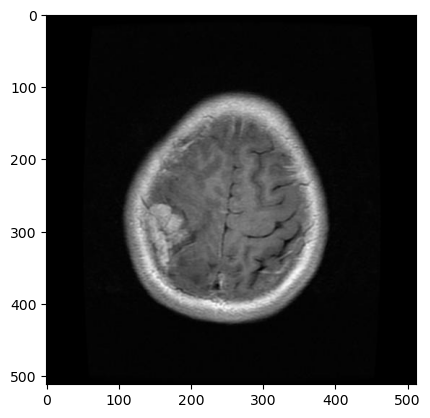

In [17]:
img = mpimg.imread('brain_tumor_dataset/Training/meningioma/Tr-me_0012.jpg')
imgplot = plt.imshow(img)
plt.show()

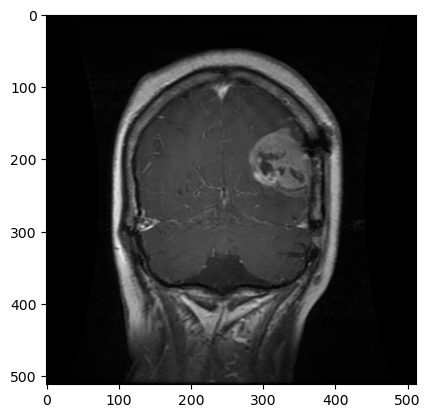

In [18]:
img = mpimg.imread('brain_tumor_dataset/Training/glioma/Tr-gl_0021.jpg')
imgplot = plt.imshow(img)
plt.show()

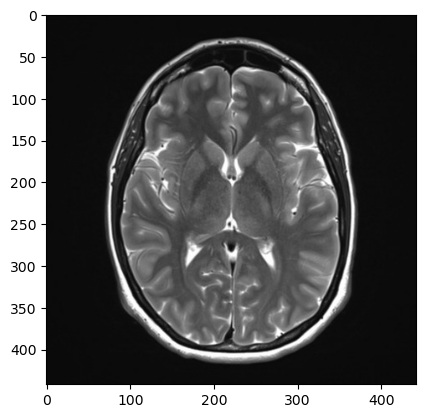

In [19]:
img = mpimg.imread('brain_tumor_dataset/Training/notumor/Tr-no_0017.jpg')
imgplot = plt.imshow(img)
plt.show()

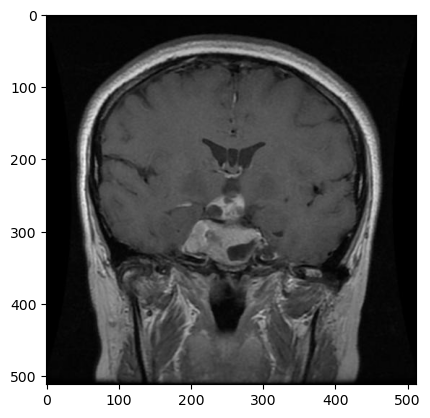

In [20]:
img = mpimg.imread('brain_tumor_dataset/Training/pituitary/Tr-pi_0016.jpg')
imgplot = plt.imshow(img)
plt.show()


# image processing
# 1.Resize the images
# 2.convert the  images to numpy arrays

In [21]:
import os
from PIL import Image
import numpy as np

In [22]:


pituitary_path = "brain_tumor_dataset/Training/pituitary"
label_map = {
    'pituitary': 0,
    'glioma': 1,
    'meningioma': 2,
    'notumor': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(pituitary_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(pituitary_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['pituitary'])  # label = 0

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

# Convert lists to numpy arrays if needed
data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} pituitary tumor images")


Loaded 1457 pituitary tumor images


In [23]:


glioma_path = "brain_tumor_dataset/Training/glioma"
label_map = {
    'pituitary': 0,
    'glioma': 1,
    'meningioma': 2,
    'notumor': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(glioma_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(glioma_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['glioma'])  # label = 1

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} glioma tumor images")


Skipped non-image file: .ipynb_checkpoints
Loaded 1321 glioma tumor images


In [24]:


meningioma_path = "brain_tumor_dataset/Training/meningioma"
label_map = {
    'pituitary': 0,
    'glioma': 1,
    'meningioma': 2,
    'notumor': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(meningioma_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(meningioma_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['meningioma'])  # label = 2

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} meningioma tumor images")


Skipped non-image file: .ipynb_checkpoints
Loaded 1339 meningioma tumor images


In [25]:


notumor_path = "brain_tumor_dataset/Training/notumor"
label_map = {
    'pituitary': 0,
    'glioma': 1,
    'meningioma': 2,
    'notumor': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(notumor_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(notumor_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['notumor'])  # label = 3

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} no tumor images")


Skipped non-image file: .ipynb_checkpoints
Loaded 1595 no tumor images


In [26]:


pituitary_test_path = "brain_tumor_dataset/Testing/pituitary"
label_map = {
    'pituitary': 0,
    'glioma': 1,
    'meningioma': 2,
    'notumor': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(pituitary_test_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(pituitary_test_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['pituitary'])  # label = 0

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} pituitary tumor test images")


Loaded 300 pituitary tumor test images


In [27]:


glioma_test_path = "brain_tumor_dataset/Testing/glioma"
label_map = {
    'pituitary': 0,
    'glioma': 1,
    'meningioma': 2,
    'notumor': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(glioma_test_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(glioma_test_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['glioma'])  # label = 1

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} glioma tumor test images")


Loaded 300 glioma tumor test images


In [28]:


meningioma_test_path = "brain_tumor_dataset/Testing/meningioma"
label_map = {
    'pituitary': 0,
    'glioma': 1,
    'meningioma': 2,
    'notumor': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(meningioma_test_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(meningioma_test_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['meningioma'])  # label = 2

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} meningioma tumor test images")


Loaded 306 meningioma tumor test images


In [29]:


notumor_test_path = "brain_tumor_dataset/Testing/notumor"
label_map = {
    'pituitary': 0,
    'glioma': 1,
    'meningioma': 2,
    'notumor': 3
}
valid_extensions = ('.jpg', '.jpeg', '.png')

data = []
labels = []

for img_file in os.listdir(notumor_test_path):
    if img_file.lower().endswith(valid_extensions):
        img_path = os.path.join(notumor_test_path, img_file)

        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((128, 128))
            image = np.array(image)

            data.append(image)
            labels.append(label_map['notumor'])  # label = 3

        except Exception as e:
            print(f"Skipped {img_file}: {e}")
    else:
        print(f"Skipped non-image file: {img_file}")

data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} no tumor test images")


Loaded 405 no tumor test images


In [30]:


def load_images_from_folder(folder_path, label):
    data = []
    labels = []
    valid_extensions = ('.jpg', '.jpeg', '.png')

    for img_file in os.listdir(folder_path):
        if img_file.lower().endswith(valid_extensions):
            img_path = os.path.join(folder_path, img_file)
            try:
                image = Image.open(img_path).convert('RGB')
                image = image.resize((128, 128))
                image = np.array(image)
                data.append(image)
                labels.append(label)
            except Exception as e:
                print(f"Skipped {img_file}: {e}")
        else:
            print(f"Skipped non-image file: {img_file}")

    return np.array(data), np.array(labels)


In [31]:
# Example loading all training classes
data_pituitary, labels_pituitary = load_images_from_folder('brain_tumor_dataset/Training/pituitary', 0)
data_glioma, labels_glioma = load_images_from_folder('brain_tumor_dataset/Training/glioma', 1)
data_meningioma, labels_meningioma = load_images_from_folder('brain_tumor_dataset/Training/meningioma', 2)
data_notumor, labels_notumor = load_images_from_folder('brain_tumor_dataset/Training/notumor', 3)

X_train = np.concatenate([data_pituitary, data_glioma, data_meningioma, data_notumor], axis=0)
y_train = np.concatenate([labels_pituitary, labels_glioma, labels_meningioma, labels_notumor], axis=0)

print(f"Total training images loaded: {len(X_train)}")


Skipped non-image file: .ipynb_checkpoints
Skipped non-image file: .ipynb_checkpoints
Skipped non-image file: .ipynb_checkpoints
Total training images loaded: 5712


In [32]:
data_pituitary_test, labels_pituitary_test = load_images_from_folder('brain_tumor_dataset/Testing/pituitary', 0)
data_glioma_test, labels_glioma_test = load_images_from_folder('brain_tumor_dataset/Testing/glioma', 1)
data_meningioma_test, labels_meningioma_test = load_images_from_folder('brain_tumor_dataset/Testing/meningioma', 2)
data_notumor_test, labels_notumor_test = load_images_from_folder('brain_tumor_dataset/Testing/notumor', 3)

# Combine test data and labels
X_test = np.concatenate([data_pituitary_test, data_glioma_test, data_meningioma_test, data_notumor_test], axis=0)
y_test = np.concatenate([labels_pituitary_test, labels_glioma_test, labels_meningioma_test, labels_notumor_test], axis=0)

print(f"Total test images loaded: {len(X_test)}")

Total test images loaded: 1311


In [33]:
# Assuming you've already loaded and labeled your data
X_train = X_train / 255.0
X_test = X_test / 255.0

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)


In [42]:
import tensorflow as tf
from tensorflow import keras

In [50]:
from tensorflow import keras

num_of_classes = 4

model = keras.Sequential()
model.add(keras.Input(shape=(128, 128, 3)))  # Add this line

model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)


In [52]:
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_test, y_test),
          epochs=30)


Epoch 1/30
179/179 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40s 208ms/step - accuracy: 0.5077 - loss: 1.1113 - val_accuracy: 0.7040 - val_loss: 0.8940
Epoch 2/30
179/179 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 201ms/step - accuracy: 0.6534 - loss: 0.8341 - val_accuracy: 0.6995 - val_loss: 0.7961
Epoch 3/30
179/179 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37s 204ms/step - accuracy: 0.6982 - loss: 0.7516 - val_accuracy: 0.7201 - val_loss: 0.8584
Epoch 4/30
179/179 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 198ms/step - accuracy: 0.7300 - loss: 0.6870 - val_accuracy: 0.7101 - val_loss: 0.8256
Epoch 5/30
179/179 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 201ms/step - accuracy: 0.7321 - loss: 0.6769 - val_accuracy: 0.6537 - val_loss: 0.9426
Epoch 6/30
179/179 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 196ms/step - accuracy: 0.7567 - loss: 0.6263 - val_accuracy: 

In [53]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 29ms/step - accuracy: 0.8063 - loss: 0.4719
Test accuracy: 0.8063


In [56]:
model.save("brain_tumor_model.keras", include_optimizer=False)


In [57]:
model = keras.models.load_model("brain_tumor_model.keras", compile=False)


Enter full path to image:brain_tumor_dataset/Training/notumor/Tr-no_0018.jpg brain_tumor_dataset/Training/notumor/Tr-no_0018.jpg


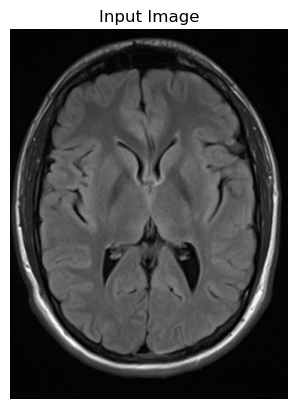

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 165ms/step

‚úÖ Prediction complete!
Prediction probabilities: [[1.0768136e-06 2.0674911e-08 9.2742063e-02 9.0725690e-01]]
üß† Predicted Tumor Type: notumor


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Load and compile the model
model = keras.models.load_model("brain_tumor_model.keras", compile=False)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Label map
label_map = {
    0: 'pituitary',
    1: 'glioma',
    2: 'meningioma',
    3: 'notumor'
}

# Get image path
image_path = input("Enter full path to image:brain_tumor_dataset/Training/notumor/Tr-no_0018.jpg")

# Load image
image = cv2.imread(image_path)
if image is None:
    print("‚ùå Failed to load image.")
    exit()

# Show image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Input Image")
plt.axis("off")
plt.show()

# Preprocess
resized = cv2.resize(image, (128, 128))
scaled = resized / 255.0
reshaped = np.reshape(scaled, (1, 128, 128, 3))

# Predict
prediction = model.predict(reshaped)
predicted_class_index = np.argmax(prediction)
predicted_class = label_map[predicted_class_index]

print("\n‚úÖ Prediction complete!")
print("Prediction probabilities:", prediction)
print(f"üß† Predicted Tumor Type: {predicted_class}")
